In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
titan = pd.read_csv("D:\python\data set/titanic_lr.csv")
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
import seaborn as sns

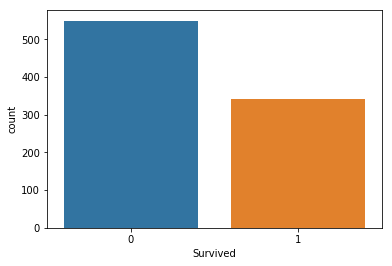

In [7]:
sns.countplot(x="Survived",data=titan)

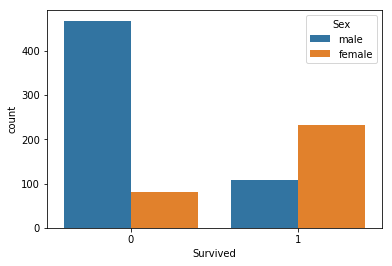

In [8]:
sns.countplot(x="Survived", hue = "Sex",data=titan)

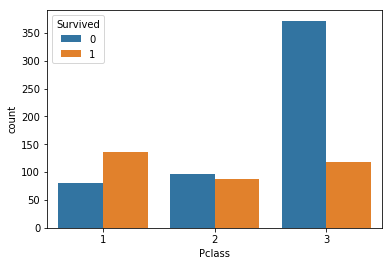

In [9]:
sns.countplot(x = "Pclass" , hue = "Survived" , data = titan)

In [10]:
x = titan["Age"]
x.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [11]:
x.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [12]:
x1 = x.fillna(0)
x1.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [13]:
x1.isnull().value_counts()

False    891
Name: Age, dtype: int64

C:\Users\vasu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


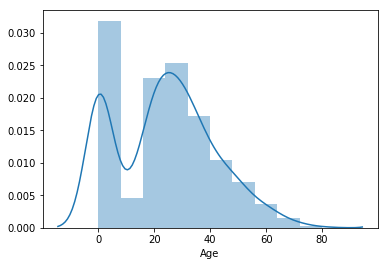

In [14]:
sns.distplot(x1 , bins = 10 ,kde=True, rug=False );


# Kde ----> Whether to plot a gaussian kernel density estimate.
# Rug ----> Whether to draw a rugplot on the support axis.

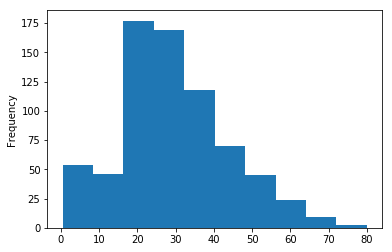

In [15]:
titan["Age"].plot.hist()


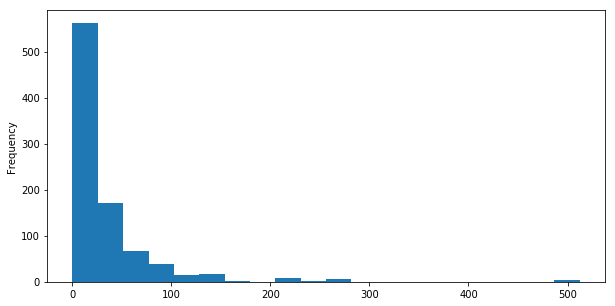

In [16]:
titan["Fare"].plot.hist(bins=20,figsize=(10,5))


# Fare is not making a big diffrence

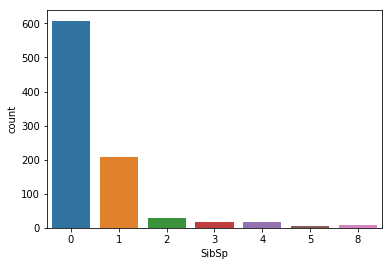

In [17]:
sns.countplot(x="SibSp",data=titan)

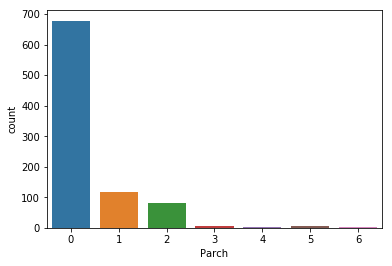

In [18]:
sns.countplot(x="Parch",data=titan)  # no of parents and children


#means who are single servived the most

In [19]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

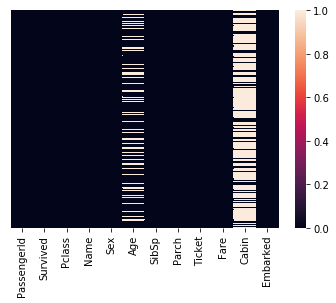

In [20]:
sns.heatmap(titan.isnull(),yticklabels = False)

In [21]:
titan_filter = titan.dropna(subset = ["Age" , "Cabin" , "Embarked"])

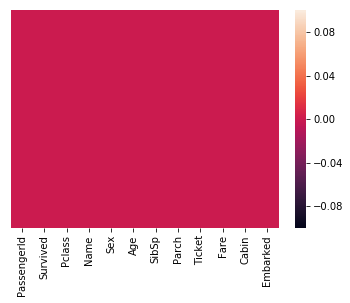

In [22]:
sns.heatmap(titan_filter.isnull(),yticklabels = False)

In [23]:
titan_filter.isnull().sum() 


#now our data is clean

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
titan_filter['gender_factor'] = pd.factorize(titan_filter.Sex)[0]
titan_filter.head()

C:\Users\vasu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender_factor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


In [25]:
pd.get_dummies(titan_filter["gender_factor"]).head()


# here 0 column denotes Female and 1 column denotes male



,0,1
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0


In [26]:
# drop 1 column as we need only one because if 1 is true other is false

gender = pd.get_dummies(titan_filter["gender_factor"],drop_first=True)
gender.head()

,1
1,0
3,0
6,1
10,0
11,0


In [27]:
embark = pd.get_dummies(titan_filter["Embarked"])
embark.head()

,C,Q,S
1,1,0,0
3,0,0,1
6,0,0,1
10,0,0,1
11,0,0,1


In [28]:
embark = pd.get_dummies(titan_filter["Embarked"] , drop_first = True)
embark.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [29]:
pcl = pd.get_dummies(titan_filter["Pclass"],drop_first=True)
pcl.head()

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [30]:
titan_filter.drop(['Sex','Embarked','PassengerId','Pclass','Name','Ticket','gender_factor', 'Cabin'],axis=1,inplace=True)

C:\Users\vasu\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
titan_filter.head()

,Survived,Age,SibSp,Parch,Fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,0,54.0,0,0,51.8625
10,1,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500


In [32]:
titan_fil =pd.concat([titan_filter,gender,embark,pcl],axis=1)

In [33]:
titan_fil.head()

,Survived,Age,SibSp,Parch,Fare,1,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0


In [34]:
# data is clean and clear , so we can train our data

x =titan_fil.drop("Survived",axis=1)
y = titan_fil["Survived"]

In [35]:
from sklearn.cross_validation import train_test_split

C:\Users\vasu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
train_test_split

<function sklearn.cross_validation.train_test_split(*arrays, **options)>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test

(      Age  SibSp  Parch      Fare  1  Q  S  2  3
 857  51.0      0      0   26.5500  1  0  1  0  0
 571  53.0      2      0   51.4792  0  0  1  0  0
 390  36.0      1      2  120.0000  1  0  1  0  0
 215  31.0      1      0  113.2750  0  0  0  0  0
 625  61.0      0      0   32.3208  1  0  1  0  0
 136  19.0      0      2   26.2833  0  0  1  0  0
 536  45.0      0      0   26.5500  1  0  1  0  0
 591  52.0      1      0   78.2667  0  0  0  0  0
 558  39.0      1      1   79.6500  0  0  1  0  0
 66   29.0      0      0   10.5000  0  0  1  1  0
 871  47.0      1      1   52.5542  0  0  1  0  0
 701  35.0      0      0   26.2875  1  0  1  0  0
 23   28.0      0      0   35.5000  1  0  1  0  0
 170  61.0      0      0   33.5000  1  0  1  0  0
 462  47.0      0      0   38.5000  1  0  1  0  0
 11   58.0      0      0   26.5500  0  0  1  0  0
 194  44.0      0      0   27.7208  0  0  0  0  0
 498  25.0      1      2  151.5500  0  0  1  0  0
 715  19.0      0      0    7.6500  1  0  1  0  1


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel=LogisticRegression()

In [40]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
logmodel.score(X_train, y_train)

0.7622950819672131

In [44]:
logmodel.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [46]:
import statsmodels.formula.api as smf

In [47]:
titan_fil.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 1, 'Q', 'S', 2, 3], dtype='object')

In [49]:
titan_fil1 = smf.ols('Survived ~ Age+Parch+Fare' , titan_fil).fit()

In [50]:
titan_fil1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     5.634
Date:                Thu, 17 Jan 2019   Prob (F-statistic):            0.00103
Time:                        10:35:09   Log-Likelihood:                -113.02
No. Observations:                 183   AIC:                             234.0
Df Residuals:                     179   BIC:                             246.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9201      0.098      9.361      0.000       0.726       1.114
Age           -0.0081      0.002     -3.631      0.000      -0.013      -0.004
Parch         -0.0678      0.050     -1.354      0.178      -0.167       0.031
Fare           0.0009      0.000      1.955      0.052   -8.84e-06       0.002
==============================================================================
Omnibus:                       91.463   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.107
Skew:                          -0.658   Prob(JB):                     5.82e-06
Kurtosis:                       1.805   Cond. No.                         335.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
titan_fil1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.071   
Dependent Variable: Survived         AIC:                234.0411
Date:               2019-01-17 10:35 BIC:                246.8791
No. Observations:   183              Log-Likelihood:     -113.02 
Df Model:           3                F-statistic:        5.634   
Df Residuals:       179              Prob (F-statistic): 0.00103 
R-squared:          0.086            Scale:              0.20586 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.9201    0.0983   9.3615  0.0000   0.7262   1.1141
Age           -0.0081    0.0022  -3.6308  0.0004  -0.0125  -0.0037
Parch         -0.0678    0.0501  -1.3536  0.1776  -0.1666   0.0310
Fare           0.0009    0.0005   1.9548  0.0522  -0.0000   0.0019
-----------------------------------------------------------------
Omnibus:              91.463       Durbin-Watson:          2.040 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       24.107
Skew:                 -0.658       Prob(JB):               0.000 
Kurtosis:             1.805        Condition No.:          335   
=================================================================

"""

In [53]:
titan_fil1.rsquared

0.08628465114719086